## Glass Identification Project

In [1]:
#Importing necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
ds=pd.read_csv(r'D:\Files\glass.csv',header=None,names=['Id','RI','Na','Mg','Ai','Si','K','Ca','Ba','Fe','Type of glass'])
ds

,Id,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


This data frame contains information related to **Glass identification**. It contains **214 rows and 11 columns** out of which 10 columns are inputs and 1 column is **target variable i.e. 'Type of glass' column**.The data frame contains only numeric data. Target variable has numeric data but as the number  represents different classes of window glass and non window glass hence, it is a **Classification Problem**.  
**The goal is to predict types of glass.**    
**'Id'  column can be dropped as it does not contribute towards the analysis.** 
  
The values in target variable represents as follows:  
1- building_windows_float_processed  
2- building_windows_non_float_processed  
3- vehicle_windows_float_processed  
4- vehicle_windows_non_float_processed (none in this database)  
5- containers  
6- tableware  
7- headlamps  

In [3]:
ds.drop('Id',axis=1,inplace=True)
ds

,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


'Id' column have been dropped succesfully and now the data frame ***contains 10 columns*** out of which 9 columns are inputs and remaining column is target variable.

In [4]:
#checking for whitespace characters 
col=ds.columns.tolist() #Storing columns name into list
space=''#Initilizing empty 'space' variable
validation=0#Initilizaing variable
for i in col:#Iterating through columns
    
    for a in range(1,11): #Iterating for 10 number of times i.e. it can detect upto 10 number of whitespaces per row
        space+=' ' #Incrementing one white space character per iteration
        
        if not ds.loc[ds[i]==space].empty:#Checking if any row contains white space characters
            validation+=1#increasing 1 in 'validation' variable
            print(f'There are white space characters present in {i} Column with length of  {len(space)}  white space characters')#Printing if a column contains white space character along with number of  white space characters present in a single row(Note:It does not print total number of white space characters present in a column)
            
    space=''#Reseting 'space' variable
    
if validation==0:
    print('This data frame does not contains any whitespace characters.')

This data frame does not contains any whitespace characters.


In [5]:
ds.dtypes#Checking dtypes

RI               float64
Na               float64
Mg               float64
Ai               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

There are two types of data present in this data frame which are int64 and float64. Majority of the data have float64 data type.

In [6]:
ds.isnull().sum() #Checking null values

RI               0
Na               0
Mg               0
Ai               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

This data frame do not contains null values.

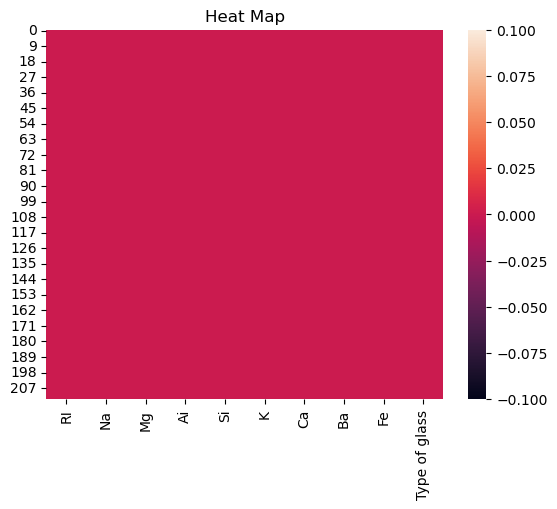

In [7]:
sb.heatmap(ds.isnull())#Visualizing null values via Heatmap
plt.title('Heat Map')
plt.show()

By visualizing null values via Heatmap,we can confirm that number of null values present are none.

In [8]:
#creating function to check for duplicates vales in data frame

def dup(x):#takes one argument i.e variable which stores variable
    a=x.duplicated().sum()#storing sum of duplicate values in 'a' variable.
    if a==0:#first condition
        print('This data frame does not contains duplicate values.')#printing
    elif a==1:#second condition
        print('There is only 1 duplicate value present in the data frame.')#printing
    else:
        print(f'Total duplicates values present in DataFrame are {x.duplicated().sum()}.')#printing
    
dup(ds)

There is only 1 duplicate value present in the data frame.


In [9]:
temp=ds[ds.duplicated()]#creating new dataframe with duplicate values
temp

,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


This is the duplicate value present in the DataFrame.

In [10]:
#Droping duplicate values
ds.drop_duplicates(inplace=True)
#rechecking duplicate values
dup(ds)

This data frame does not contains duplicate values.


All the duplicates have been handled.

In [11]:
ds

,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Now the DataFrame have ***213 rows***.

In [12]:
ds.info()#Checking more information related to datas frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             213 non-null    float64
 1   Na             213 non-null    float64
 2   Mg             213 non-null    float64
 3   Ai             213 non-null    float64
 4   Si             213 non-null    float64
 5   K              213 non-null    float64
 6   Ca             213 non-null    float64
 7   Ba             213 non-null    float64
 8   Fe             213 non-null    float64
 9   Type of glass  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


This shows information related to the columns and about their Non-null count and Dtype. It also shows the memory usage , which is 18.3 KB in this case.

In [13]:
for i in col:#Iterating col variable
    print('\n',i,':-\nUnique values:',ds[i].unique(),'\nNumber of unique values:',ds[i].nunique(),'\n\n',ds[i].value_counts().to_frame('Value Counts'))#Printing


 RI :-
Unique values: [1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.51911 1.51735
 1.5175  1.51966 1.51736 1.51751 1.5172  1.51764 1.51793 1.51721 1.51768
 1.51747 1.51775 1.51753 1.51783 1.51567 1.51909 1.51797 1.52213 1.51779
 1.5221  1.51786 1.519   1.51869 1.52667 1.52223 1.51898 1.5232  1.51926
 1.51808 1.51837 1.51778 1.51769 1.51215 1.51824 1.51754 1.51905 1.51977
 1.52172 1.52227 1.52099 1.52152 1.523   1.51574 1.51848 1.51593 1.51631
 1.5159  1.51645 1.51627 1.51613 1.51592 1.51646 1.51594 1.51409 1.51625
 1.51569 1.5164  1.51841 1.51605 1.51588 1.51629 1.5186  1.51689 1.51811
 1.51655 1.5173  1.5182  1.52725 1.5241  1.52475 1.53125 1.53393 1.52222
 1.51818 1.52664 1.52739 1.52777 1.51892 1.51847 1.51846 1.51829 1.51708
 1.51673 1.51652 1.51844 1.51663 1.51687 1.51707 1.52177 1.51872 1.51667
 1.52081 1.52068 1.5202  1.52614 1.51813 1.518   1.51789 1.51806 1.51711
 1.51674 1.5169  1.51851 1.5

This gives a breif information about unique values, count of unique values and value counts of each column present in the dataset. Target variable do not have same number of catagorical data  thus this data is unbalanced. 

In [14]:
ds.describe()#Using describe function

,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000



  
  
This gives the statistical information of the numerical columns. From the above description we can observe the following:   
1)All the columns have same count thus there are no missing values.    
2)Mean is less than 50% in Mg, feature which means that the data is skewed to the left in this column.  
3)There is a huge jump between 75% and max in Ca feature, hence, there might be outliers present in this column. 

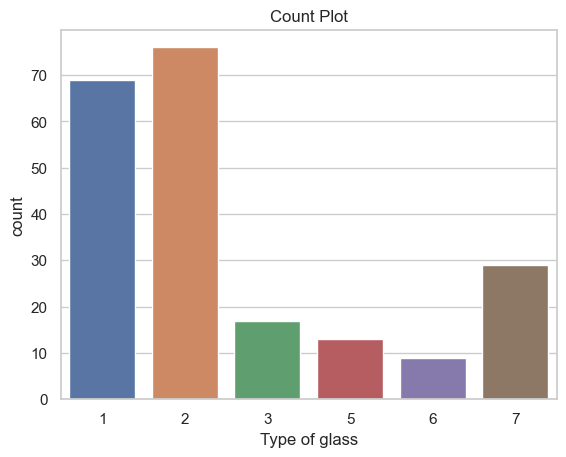

In [15]:
#Visualizing Type of glass via Count Plot
sb.set_theme(style="whitegrid")
sb.countplot(data=ds,x='Type of glass')
plt.title("Count Plot")
plt.show()

Among all of these Types of glass, type 1 and 2 are the most high.Type 2 is a bit high than type 1. 

In [16]:
log=[]#creating empty list
def re():#creating function
    for i in col[:-1]:#iterating col variable
        if i not in log:#using if condition to plot graphs
            sb.lmplot(data=ds,x=log[-1],y=i)
            plt.title('Linear Model Plot')
    plt.show()

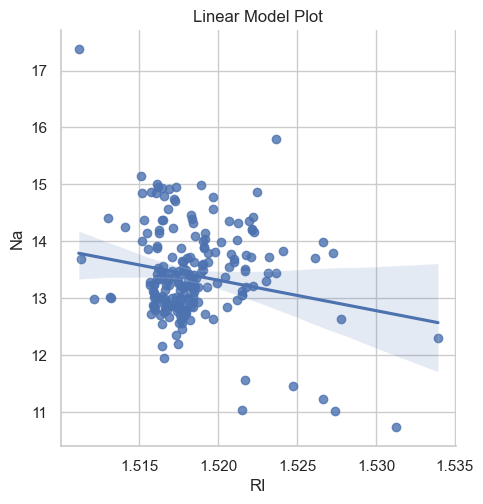

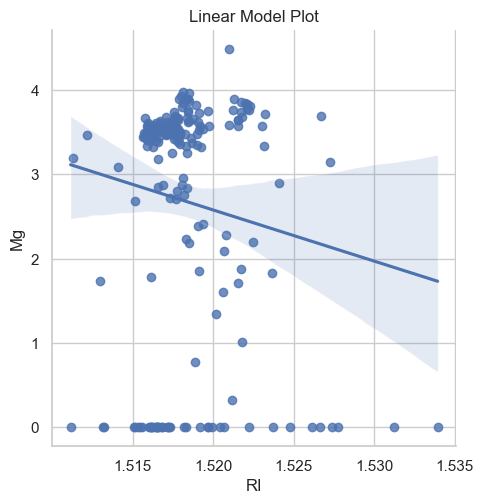

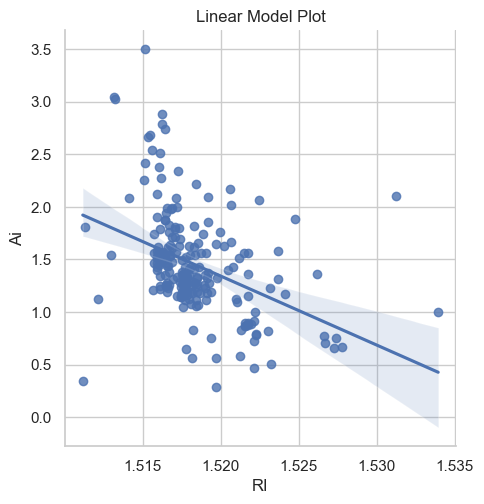

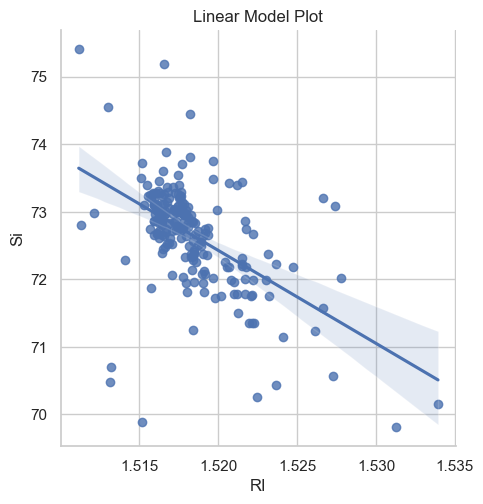

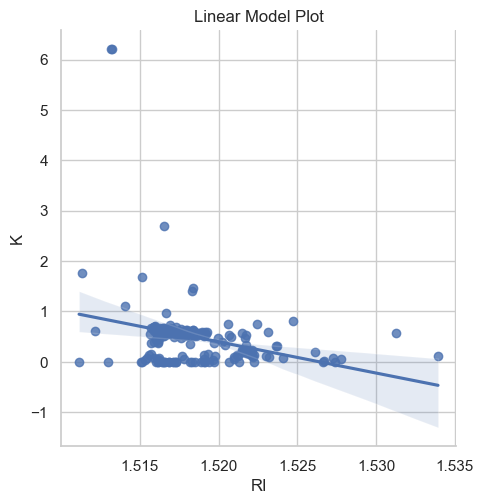

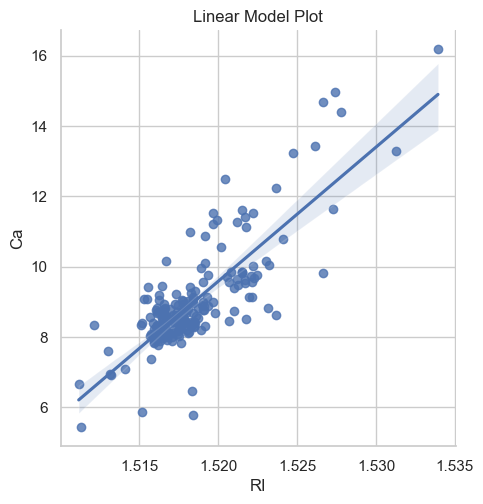

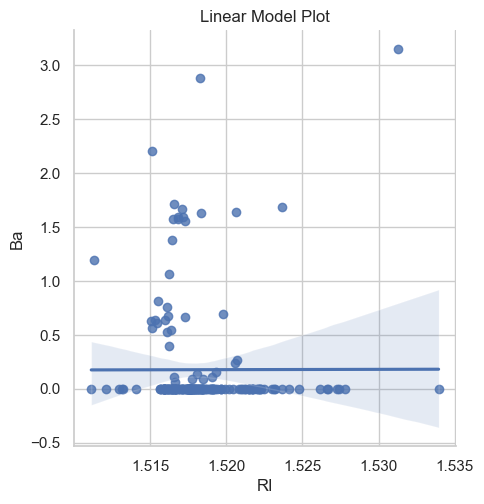

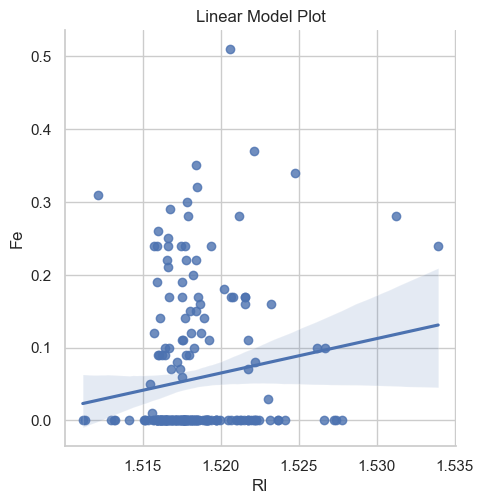

In [17]:
#Checking relation of RI feature with other features
log.append('RI')
re()

RI feature have low negative linear relation with Na and K features, and high negative linear relation with Si and Ai features.  
RI feature have high positive linear relation with Ca, and low postive linear relation with Fe feature.  
RI feature does not have linear relation with Ba feature.

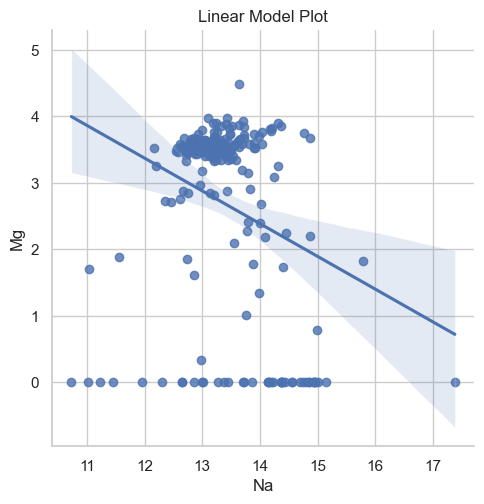

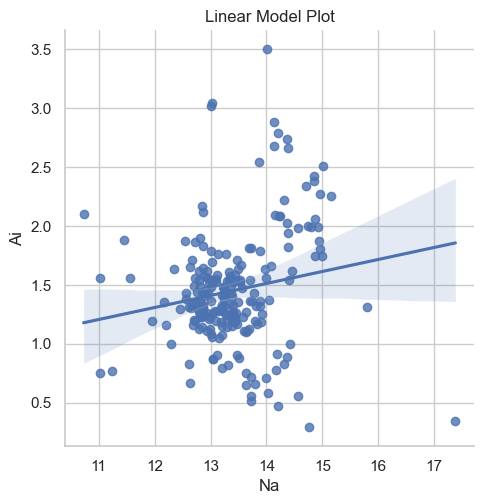

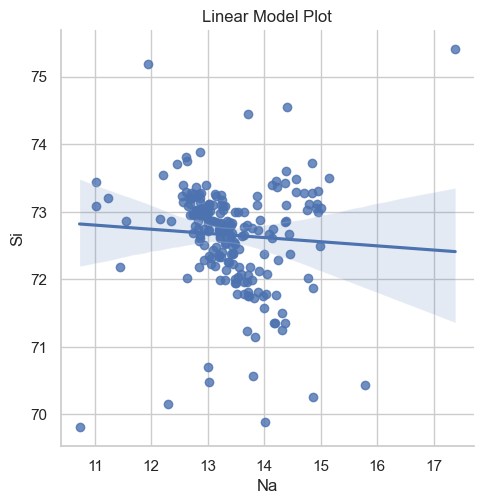

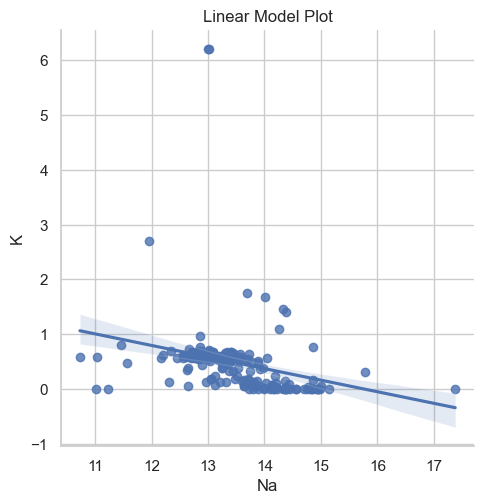

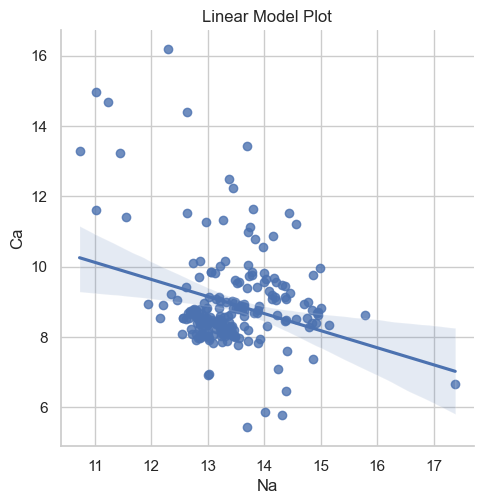

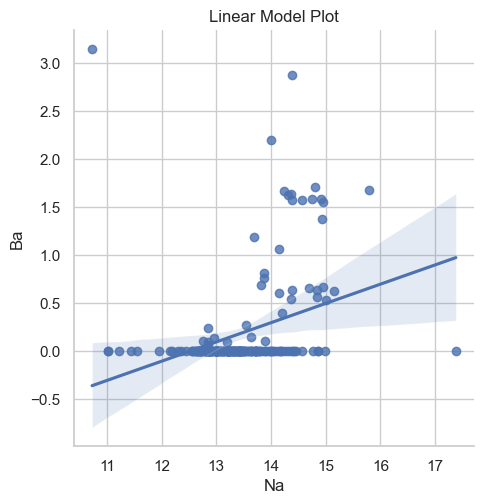

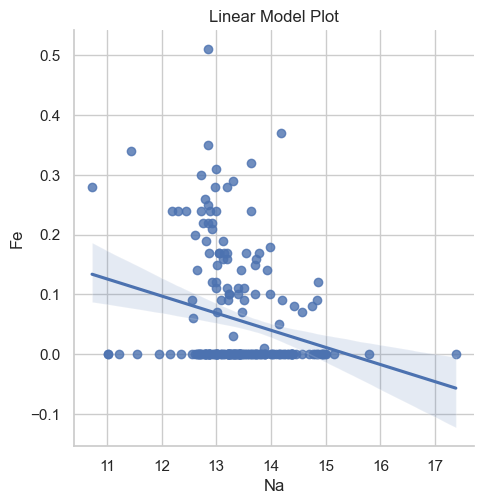

In [18]:
#Checking relation of Na feature with other features
log.append('Na')
re()

Na feature have high negative linear relation with Mg feature, and low negative linear relation with Si,K,Ca and Fe features.  
Na feature have low positive linear relation with Ai and Ba features.

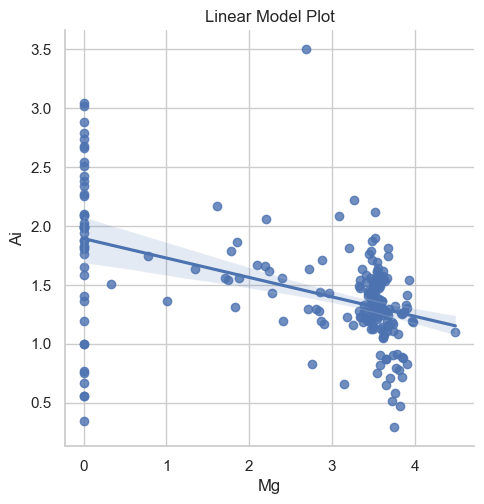

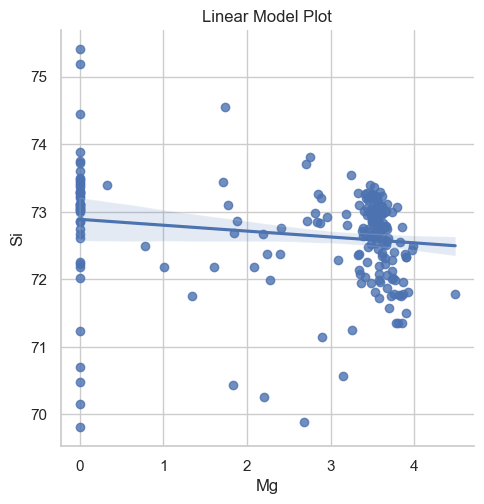

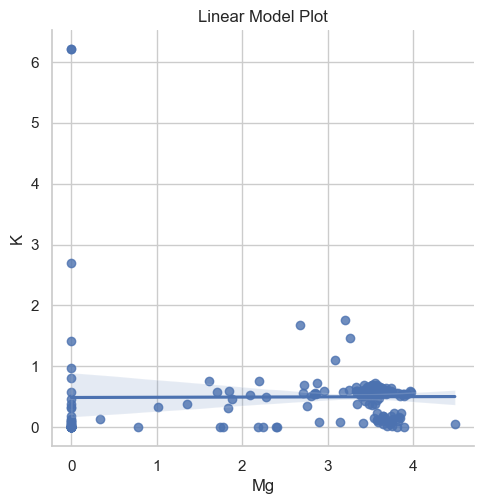

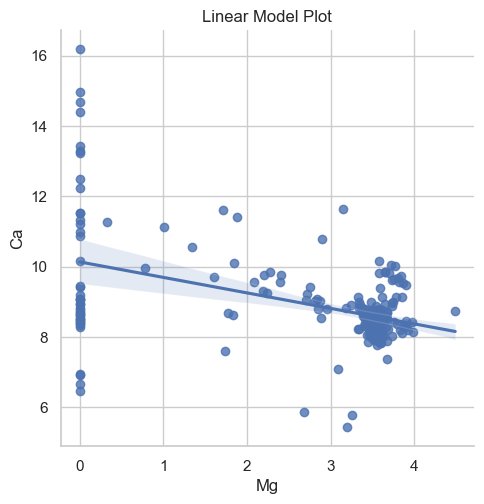

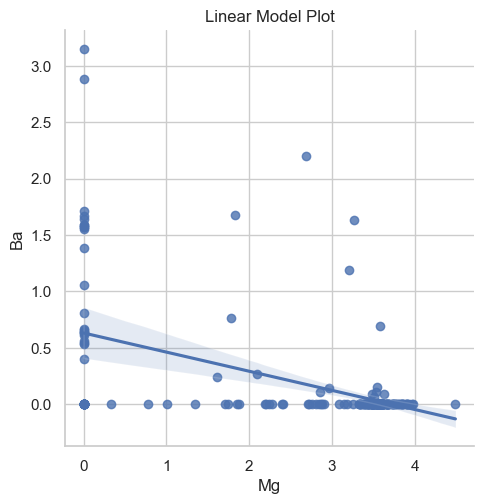

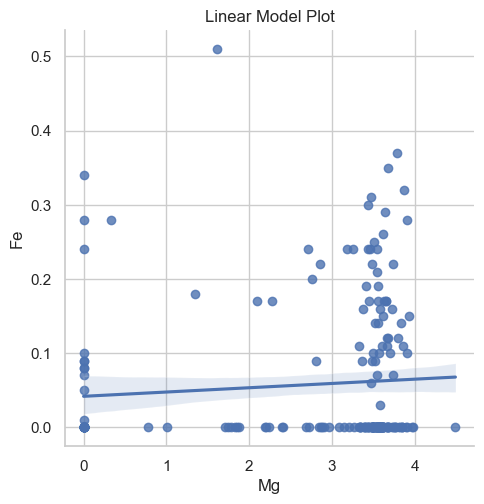

In [19]:
#Checking relation of Mg feature with other features
log.append('Mg')
re()

Mg feature have low high postive linear relation with Fe feature.  
Mg feature have low negative linear relation with Ai,Si,Ca and Ba features.  
Mg feature have almost no linear relation with K feature.

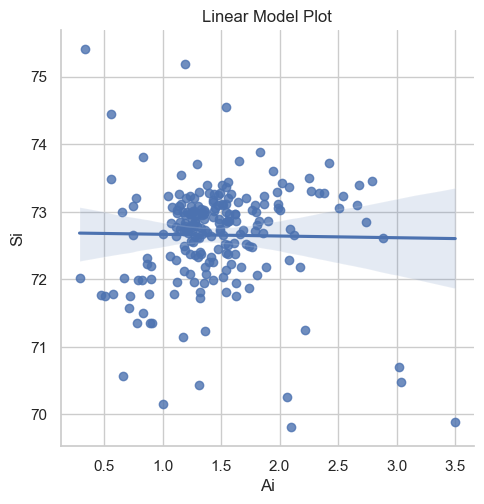

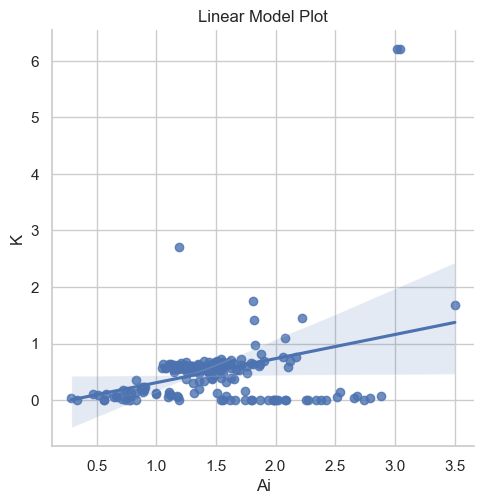

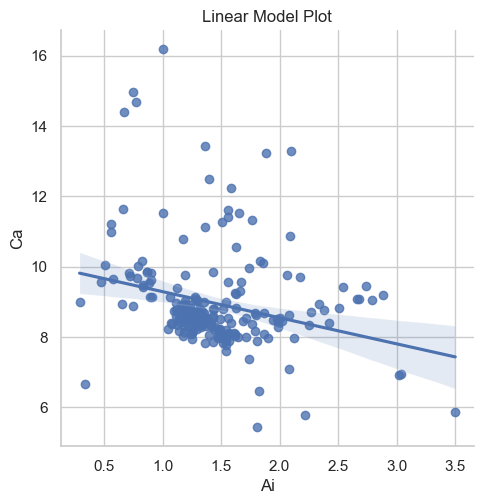

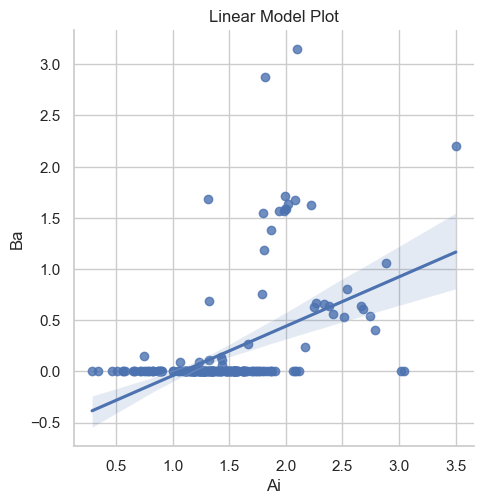

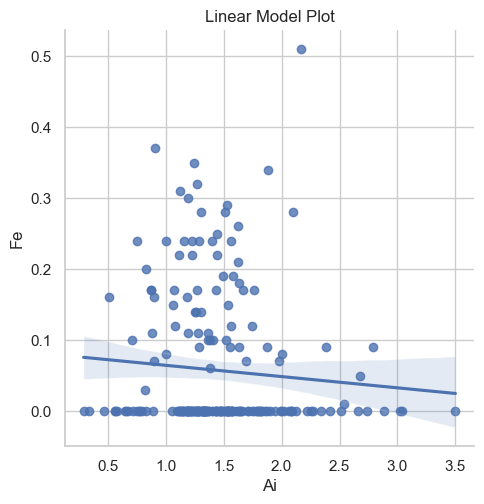

In [20]:
#Checking relation of Ai feature with other features
log.append('Ai')
re()

Ai feature have low positive linear relation with K feature,and high positive linear relation with Ba feature.  
Ai feature have high negative linear relation with Mg, and low negative linear relation with Ca and Fe features.  
Ai feature almost  have no linear relation with Si feature.

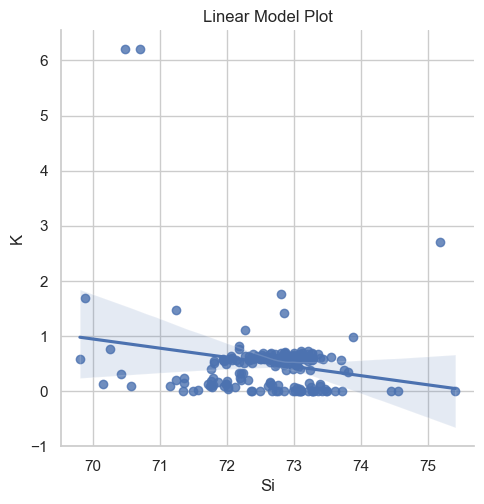

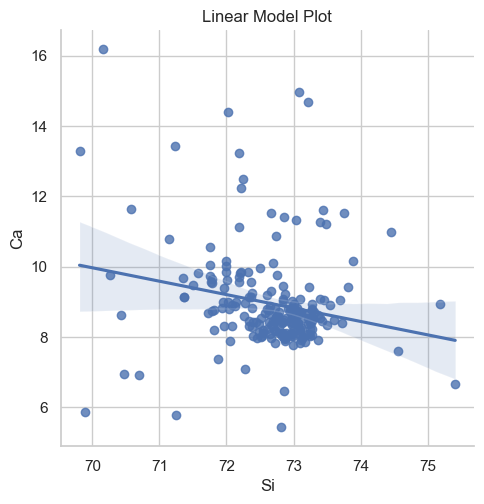

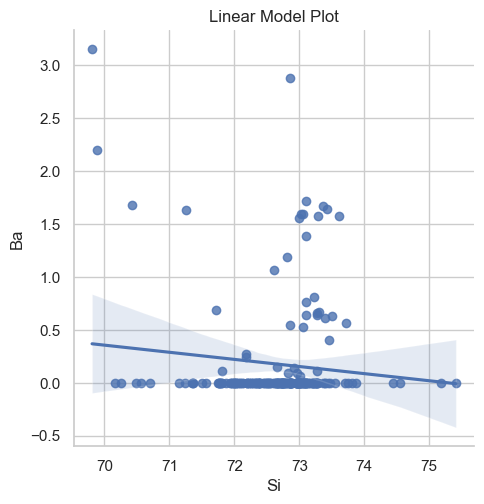

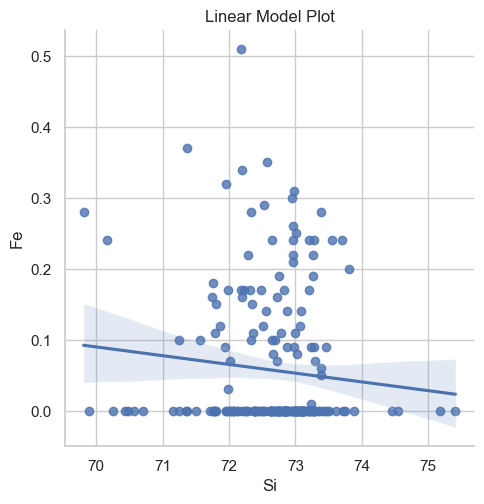

In [21]:
#Checking relation of Si feature with other features
log.append('Si')
re()

Si feature  have high negative linear relation with Mg feature , and low negative linear relation with K,Ca,Ba and Fe features.

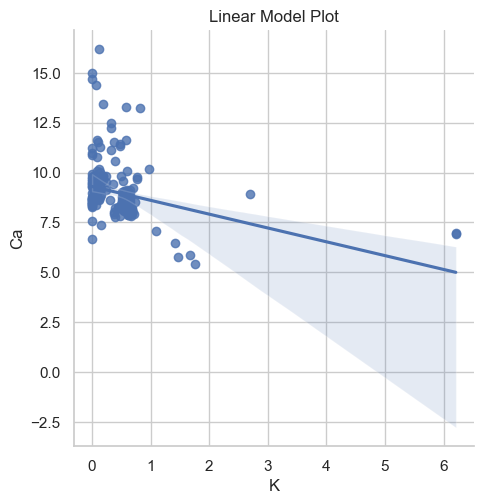

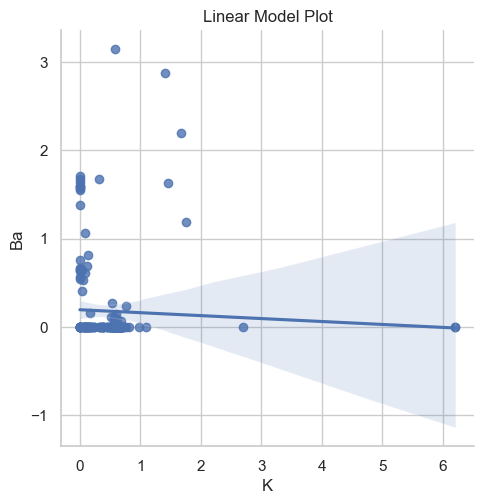

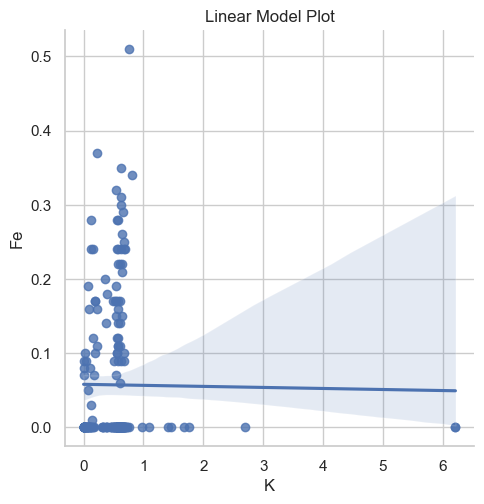

In [22]:
#Checking relation of K feature with other features
log.append('K')
re()

K feature have low negative linear relation with Fe,Ba and Ca features.

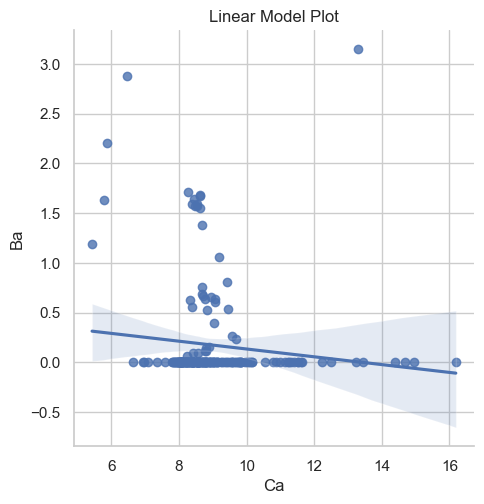

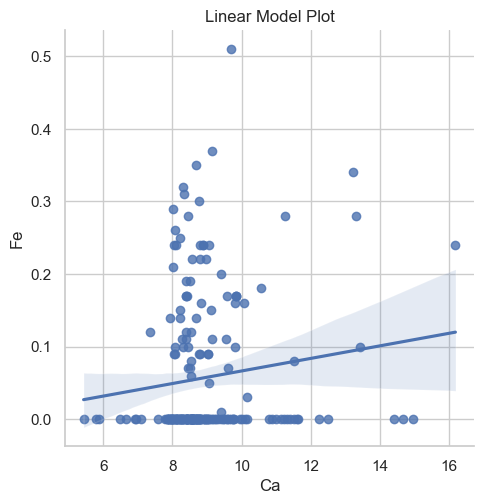

In [23]:
#Checking relation of Ca feature with other features
log.append('Ca')
re()

Ca feature have low negative linear relation with Ba feature.  
Ca feature have low positive linear relation with Fe feature.

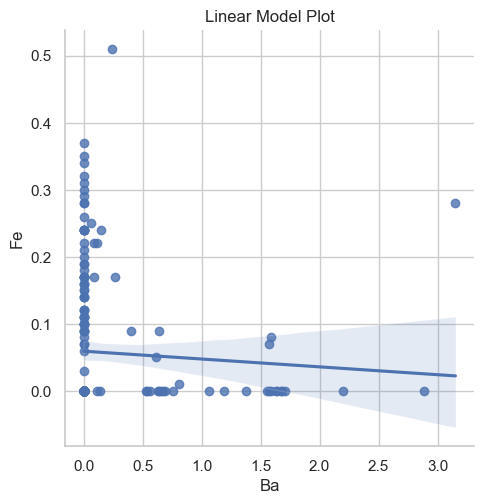

In [24]:
#Checking relation between Ba and Fe features 
log.append('Ba')
re()

Ba feature have low negative relation with Fe feature.

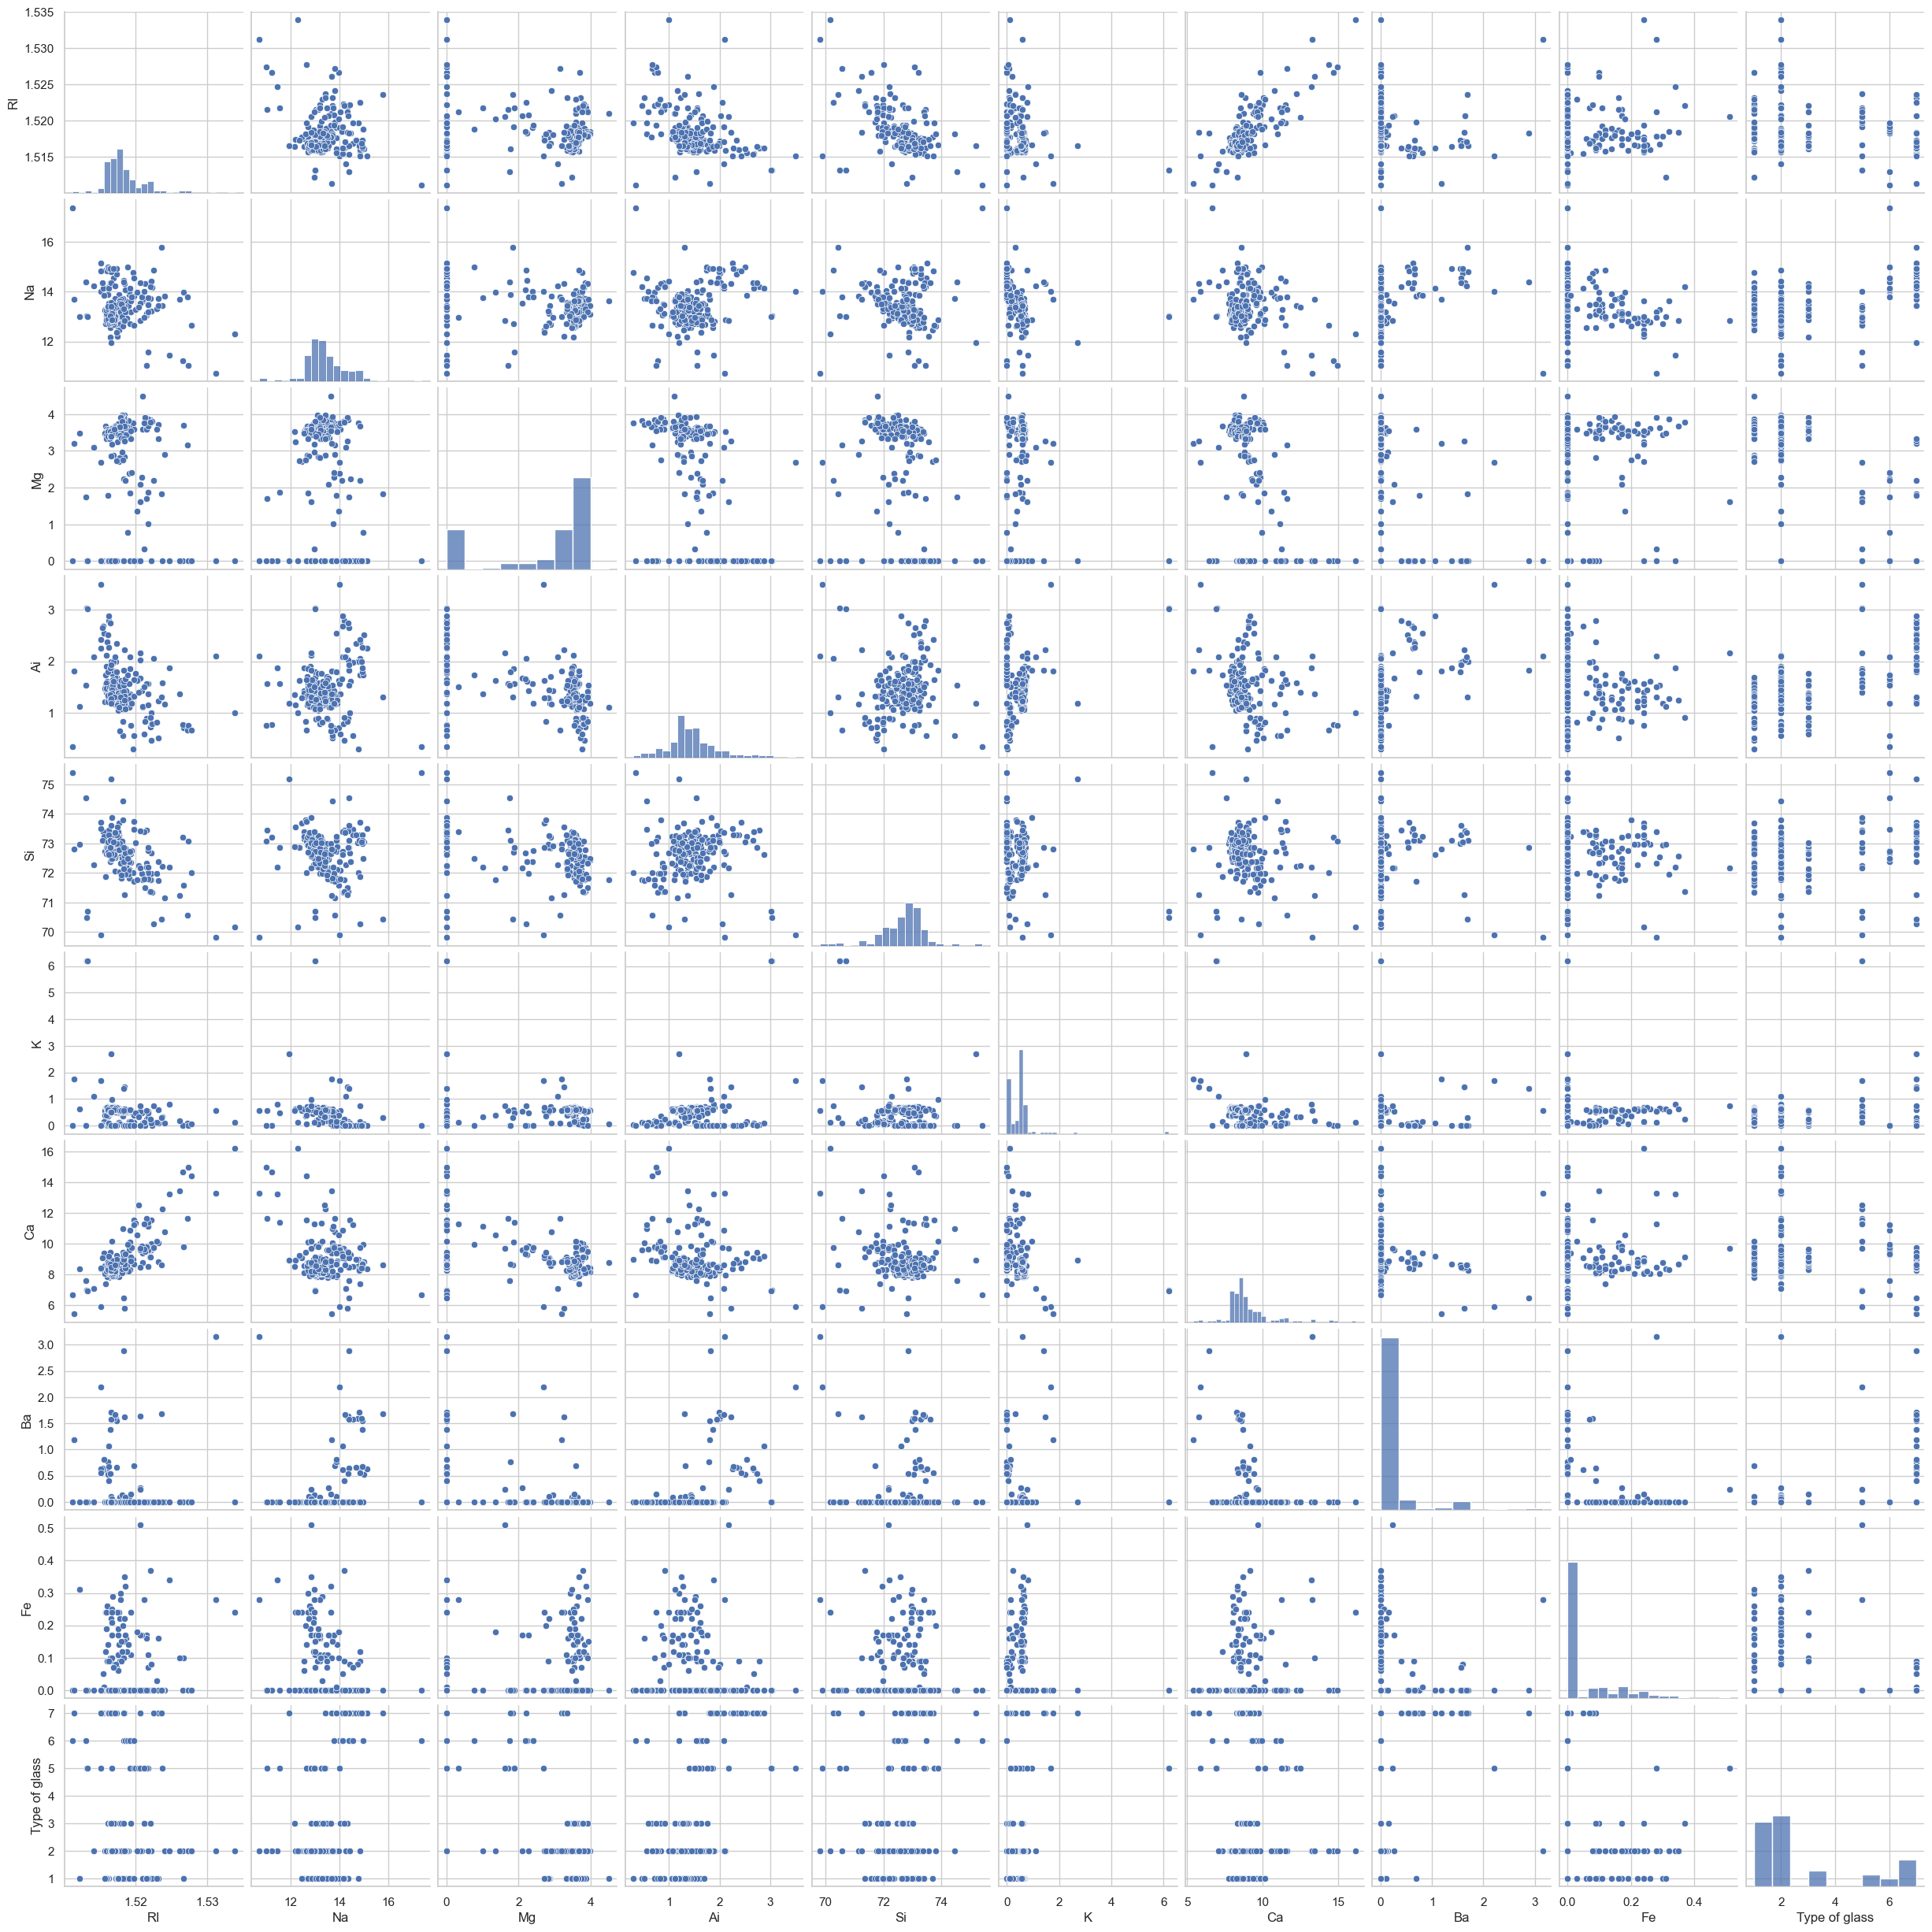

In [25]:
#Visualizing relation between features with multiple plots via Pair plot 
sb.pairplot(data=ds)
plt.show()

This gives pairwise relation ship between the features along with their distribution in the diagonals.

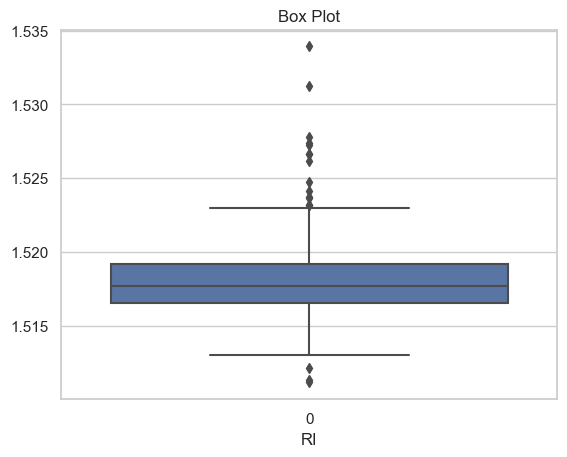

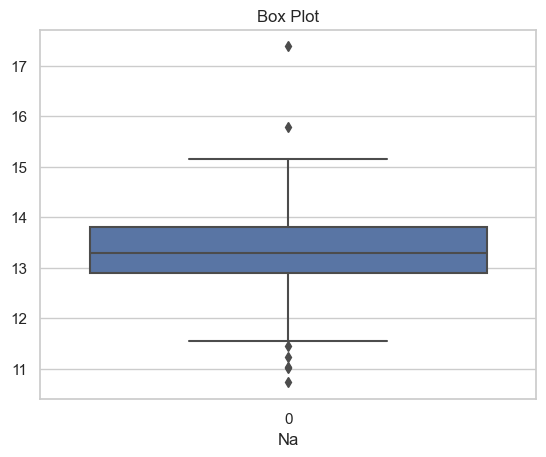

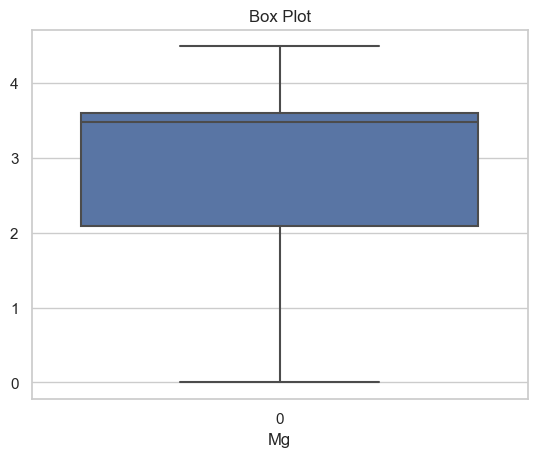

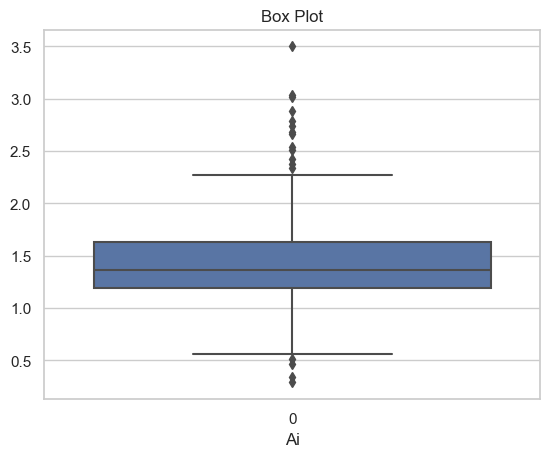

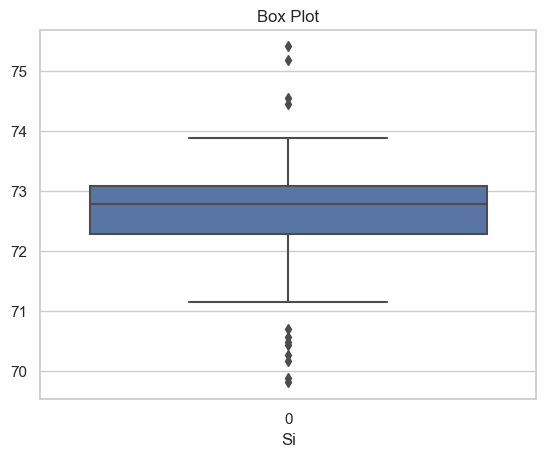

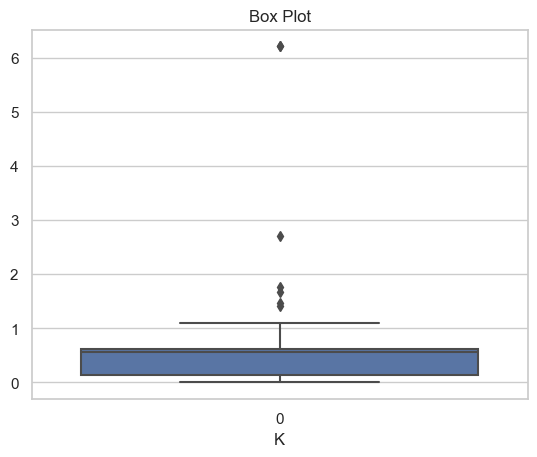

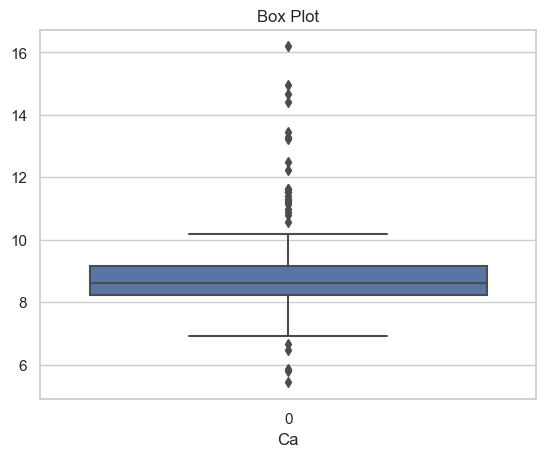

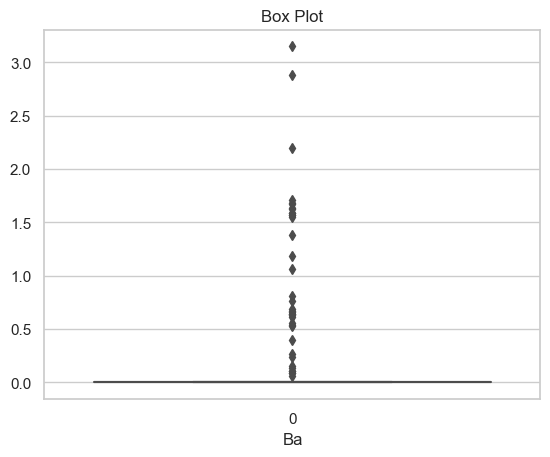

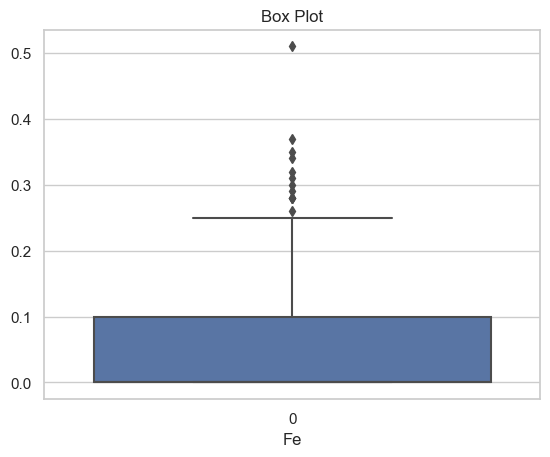

In [26]:
#Checking outliers
for i in col[:-1]:
    sb.boxplot(ds[i])
    plt.xlabel(i)
    plt.title('Box Plot')
    plt.show()

All features have outliers present in them.

In [27]:
#removing outliers using zscore
#Importing necessary libraries
from scipy.stats import zscore as zs
import numpy as np
f_outlier=ds[col[:-1]]
z=np.abs(zs(f_outlier))
z

,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,0.706370,1.133248,0.673480,0.143466,0.353808,0.588301
1,0.243816,0.596403,0.639311,0.180863,0.097037,0.028962,0.790201,0.353808,0.588301
2,0.716412,0.154546,0.604596,0.182950,0.433746,0.167073,0.825349,0.353808,0.588301
3,0.227291,0.238216,0.701798,0.322346,0.058368,0.109149,0.516041,0.353808,0.588301
4,0.306608,0.164573,0.653197,0.423405,0.550299,0.078457,0.621487,0.353808,0.588301
...,...,...,...,...,...,...,...,...,...
209,0.699888,0.903249,1.860172,2.891336,0.058368,0.642789,0.158812,1.778672,0.588301
210,0.494986,1.860605,1.860172,1.092483,0.524398,0.765554,0.389506,2.844912,0.588301
211,0.760865,1.173272,1.860172,1.153118,0.990612,0.765554,0.361387,2.945501,0.588301
212,0.607351,1.197820,1.860172,0.991424,1.236668,0.765554,0.333268,2.804676,0.588301


The variables z holds the zscores values of these features.

In [28]:
np.where(z>3)

(array([104, 105, 105, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111,
        130, 144, 161, 162, 162, 162, 170, 170, 171, 171, 173, 183, 183,
        187, 188, 200, 200, 202, 206, 212], dtype=int64),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))

These are the index of  ouliers present in the features.

In [29]:
z.iloc[104,6]

3.0128811518865994

In [30]:
z.iloc[105,0]

4.26402702097023

In [31]:
z.iloc[130,6]

3.1534756716262957

In [32]:
z.iloc[212,7]

3.005853771070198

We have confirmed that these values holds outliers as per the threshold value.

In [33]:
#Removing outliers
zscore=ds[(z<3).all(axis=1)]

In [34]:
#Using IQR method to verify that can it remove outliers with less data loss than zscore method?
q1=f_outlier.quantile(.25)
q3=f_outlier.quantile(.75)
iqr=q3-q1
IQR=ds[~((ds< (q1-1.5*iqr)) | (ds>(q3+1.5*iqr))).any(axis=1)]

In [35]:
print('Data loss percentage after removing outliers via zscore',((ds.shape[0]-zscore.shape[0])/ds.shape[0])*100)
print('Data loss percentage after removing outliers via IQR',((ds.shape[0]-IQR.shape[0])/ds.shape[0])*100)

Data loss percentage after removing outliers via zscore 9.389671361502346
Data loss percentage after removing outliers via IQR 36.61971830985916


We can observe that zscore method performed well here, hence, we will update the dataframe with zscore method.

In [36]:
outliers=ds.shape[0]-zscore.shape[0]
print(f'Outliers removed : {outliers}')

Outliers removed : 20


In [37]:
ds=zscore#Updating dataframe

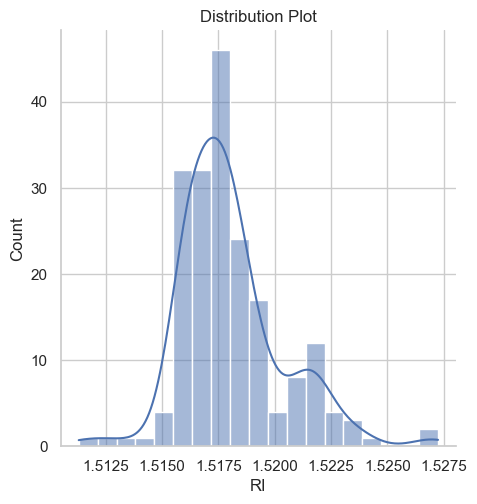

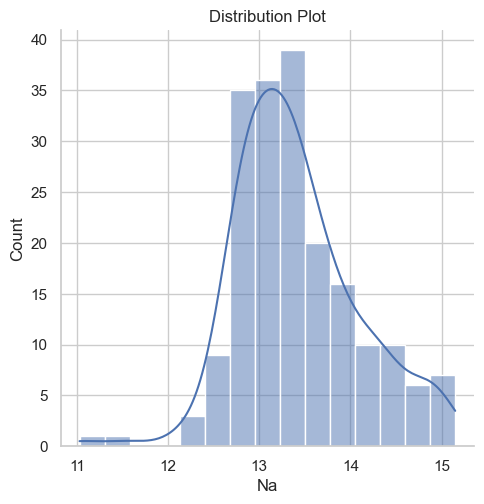

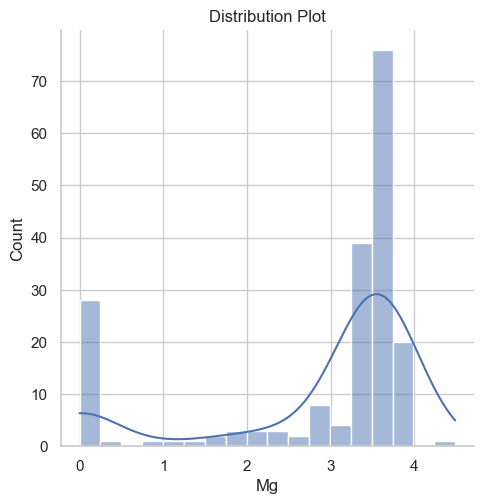

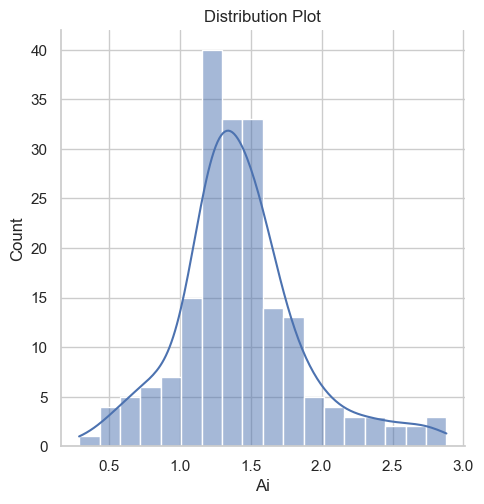

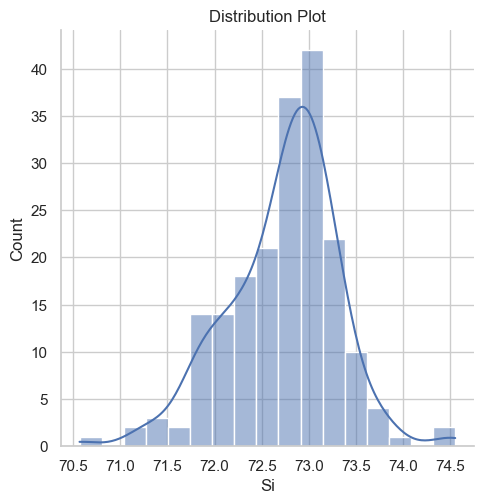

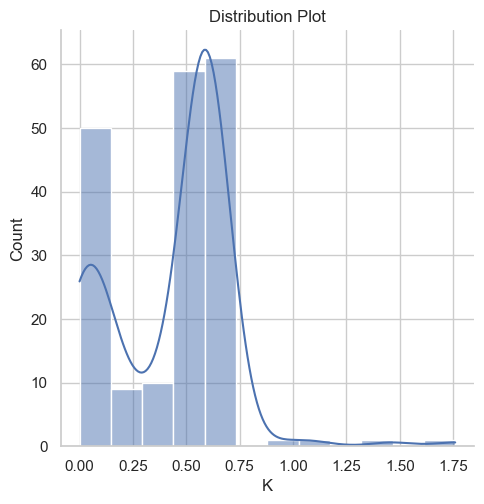

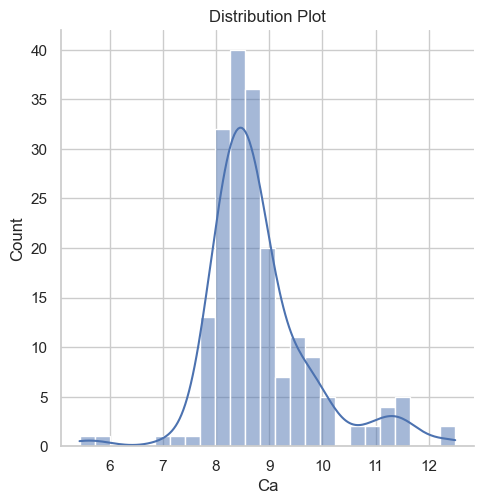

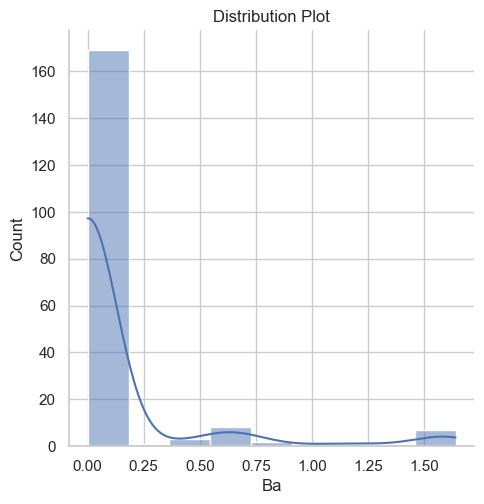

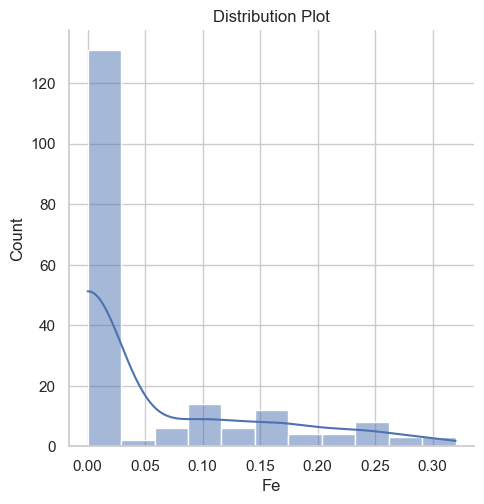

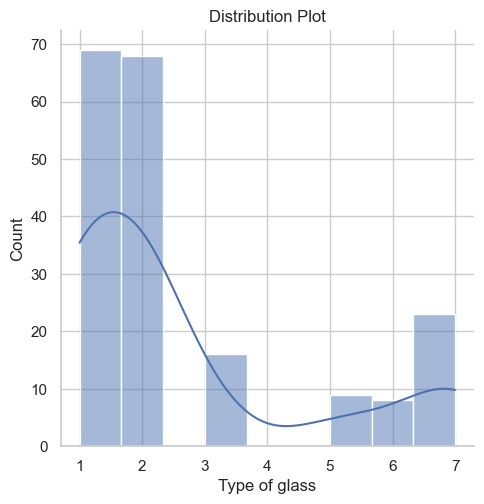

In [38]:
#checking distribution of columns
for i in col:
    sb.displot(ds[i],kde=True)
    plt.title('Distribution Plot')    

RI,Ba and Fe features are skewed to the right.  
Mg feature is skewed to the left.  
The rest of features have almost normal distribution.

In [39]:
ds.skew()

RI               0.972271
Na               0.384484
Mg              -1.521807
Ai               0.700499
Si              -0.436027
K                0.295387
Ca               1.089590
Ba               3.178256
Fe               1.478611
Type of glass    1.277279
dtype: float64

We can ignore target variable as it has catagorical data.RI,Mg,Ai,Ca,Ba and Fe features does not fall under the accpetable range , thus , we can use yeojohnson method to remove skewness.

In [40]:
a=['RI','Mg','Ai','Ca','Ba','Fe']
from scipy.stats import yeojohnson as yj
for i in a:
    ds[i],p=yj(ds[i])
ds.skew()

RI               0.000000
Na               0.384484
Mg              -1.023486
Ai               0.010097
Si              -0.436027
K                0.295387
Ca              -0.084253
Ba               1.963711
Fe               0.852040
Type of glass    1.277279
dtype: float64

There is still skewness in Mg,Ba and Fe features.We can try cuberoot method.

In [41]:
for i in a:
    ds[i]=np.cbrt(ds[i])
ds.skew()

RI               0.000000
Na               0.384484
Mg              -1.671569
Ai              -0.823275
Si              -0.436027
K                0.295387
Ca              -0.213471
Ba               1.879762
Fe               0.769218
Type of glass    1.277279
dtype: float64

There is still skewness in Mg,Ba and Fe features.We can try log + 1 method.

In [42]:
a=['Mg','Ba','Fe']
for i in a:
    ds[i]=np.log1p(ds[i])
ds.skew()

RI               0.000000
Na               0.384484
Mg              -1.849317
Ai              -0.823275
Si              -0.436027
K                0.295387
Ca              -0.213471
Ba               1.875391
Fe               0.764758
Type of glass    1.277279
dtype: float64

There is still skewness in Mg,Ba and Fe features.We can try square root method.

In [43]:
for i in a:
    ds[i]=np.sqrt(ds[i])
ds.skew()

RI               0.000000
Na               0.384484
Mg              -1.967057
Ai              -0.823275
Si              -0.436027
K                0.295387
Ca              -0.213471
Ba               1.866428
Fe               0.752053
Type of glass    1.277279
dtype: float64

There is still skewness in Mg,Ba and Fe features.As the some data are zeros thus, can not apply other methods ,hence, we can accept these skewness values as thresholds values.

In [44]:
#Checking correlation between independant and dependant varibales
cor=ds.corr()
cor

,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,0.098354,-0.012482,-0.461527,-0.580033,-0.390681,0.684468,-0.159874,0.038848,-0.024400
Na,0.098354,1.000000,-0.535475,0.128348,-0.227131,-0.609457,0.007372,0.494206,-0.121616,0.540764
Mg,-0.012482,-0.535475,1.000000,-0.444421,-0.354457,0.494747,-0.350815,-0.593275,0.078179,-0.766632
Ai,-0.461527,0.128348,-0.444421,1.000000,0.339097,0.128318,-0.284909,0.458912,-0.054711,0.555015
Si,-0.580033,-0.227131,-0.354457,0.339097,1.000000,0.063589,-0.141321,0.178822,-0.010951,0.257606
K,-0.390681,-0.609457,0.494747,0.128318,0.063589,1.000000,-0.557575,-0.278665,0.016305,-0.390192
Ca,0.684468,0.007372,-0.350815,-0.284909,-0.141321,-0.557575,1.000000,-0.125283,0.040433,0.108629
Ba,-0.159874,0.494206,-0.593275,0.458912,0.178822,-0.278665,-0.125283,1.000000,0.043706,0.627115
Fe,0.038848,-0.121616,0.078179,-0.054711,-0.010951,0.016305,0.040433,0.043706,1.000000,-0.159328
Type of glass,-0.024400,0.540764,-0.766632,0.555015,0.257606,-0.390192,0.108629,0.627115,-0.159328,1.000000


This gives us correlation among the columns.

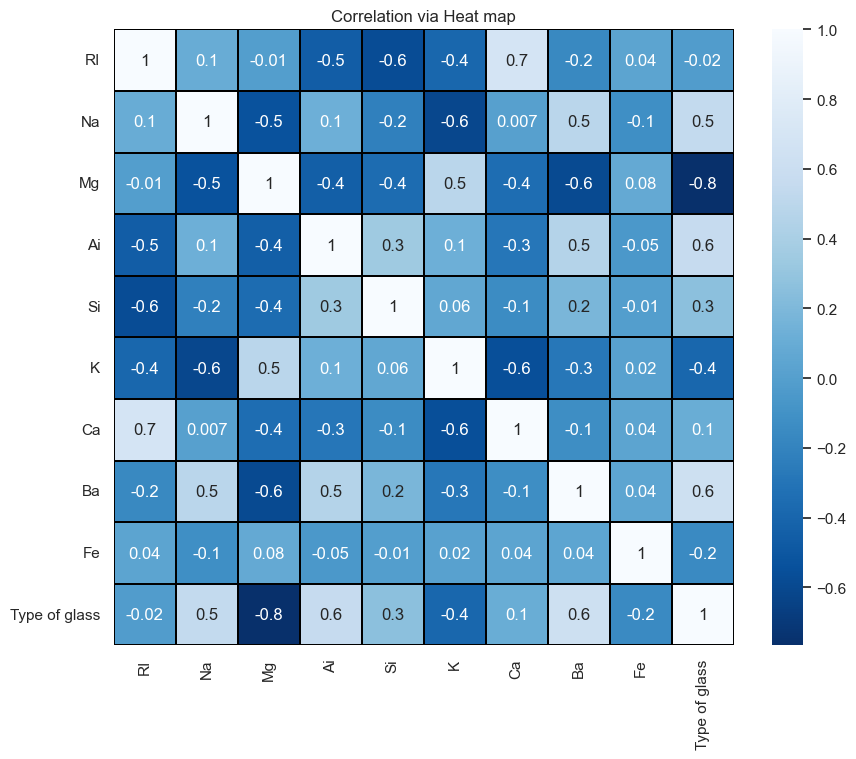

In [45]:
#Visualizing correlation
plt.figure(figsize=(10, 8))
sb.heatmap(cor,annot=True,cmap="Blues_r",linecolor='black',linewidths=0.1,fmt='0.1g')
plt.title('Correlation via Heat map')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

We can observe the following from this heatmap:     
1)Na,Ai and Ba features have moderate positve correlation with target variable.  
2)Si and Ca features have low  positve correlation with the target variable.      
3)Mg feature have high negative correlation with the target variable.  
4)Ri and Fe features have low negative correlation with target variable.  
5)K feature have low moderate correlation with target variable.

In [46]:
#Separating features and target variable 
x=ds.drop('Type of glass',axis=1)
y=ds['Type of glass']

In [47]:
#checking dimensions of features and label 
print('Dimensions of features:',x.shape[0],'\nDimensions of label:',y.shape[0])

Dimensions of features: 193 
Dimensions of label: 193


We can observe that both label and features have same number of dimensions.

In [48]:
#Importing required library to apply StandardScaler
from sklearn.preprocessing import StandardScaler as sc
sc=sc()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x

,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe
0,2.220446e-16,0.338598,0.591529,-0.653306,-1.627964,-1.326595,0.012319,-0.437260,-0.695436
1,-5.551115e-17,0.711257,0.459512,-0.002771,0.007672,0.166308,-1.051627,-0.437260,-0.695436
2,-1.665335e-16,0.174628,0.451311,0.380708,0.455320,-0.153600,-1.115084,-0.437260,-0.695436
3,-5.551115e-17,-0.302375,0.474040,-0.165350,-0.198935,0.486216,-0.577682,-0.437260,-0.695436
4,-5.551115e-17,-0.212937,0.462766,-0.286755,0.610274,0.415125,-0.755693,-0.437260,-0.695436
...,...,...,...,...,...,...,...,...,...
188,-1.665335e-16,1.426762,-2.406432,2.161983,0.214279,-1.539867,0.710101,2.320297,-0.695436
189,-1.665335e-16,1.083916,-2.406432,2.315252,-0.198935,-1.255504,0.450965,2.323594,-0.695436
190,-1.665335e-16,2.246611,-2.406432,1.174007,0.575840,-1.539867,-0.370718,2.323724,-0.695436
191,1.665335e-16,1.411856,-2.406432,1.220329,1.195660,-1.539867,-0.325674,2.323727,-0.695436


The data is scaled using StandarScaler method to overcome the issue of biasness.

In [49]:
#Checking varience inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #Importing required library
v=pd.DataFrame()
v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]
v['Features']=x.columns
v

,VIF,Features
0,4.077116,RI
1,6.083418,Na
2,7.106442,Mg
3,2.006872,Ai
4,2.881013,Si
5,4.120134,K
6,5.329481,Ca
7,2.215221,Ba
8,1.054031,Fe


Here we can observe that the features do not have multicollineraity problem.

In [50]:
y.value_counts()

1    69
2    68
7    23
3    16
5     9
6     8
Name: Type of glass, dtype: int64

As the data in target variable is not balanced , we can use oversampling method.

In [51]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [52]:
y1.value_counts()

1    69
2    69
3    69
5    69
6    69
7    69
Name: Type of glass, dtype: int64

The data is balanced now.

In [60]:
#checking how much data is sampled  
print('Dimensions of features before sampling:',x.shape[0],'\nDimensions of label before sampling:',y.shape[0],'\nDimensions of features after sampling:',x1.shape[0],'\nDimensions of label after sampling:',y1.shape[0],'\nDiffernce = ',x1.shape[0]-x.shape[0])
#Updating
x=x1
y=y1

Dimensions of features before sampling: 414 
Dimensions of label before sampling: 414 
Dimensions of features after sampling: 414 
Dimensions of label after sampling: 414 
Differnce =  0


In [59]:
#Importing libraries
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score 
#Finding best random state
ac_updater=0
rs_updater=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)
    RFR=rfc()
    RFR.fit(x_train,y_train)
    pr=RFR.predict(x_test)
    ac=accuracy_score(y_test,pr)
    if ac>ac_updater:
        ac_updater=ac
        rs_updater=i
print('Max accuracy score during the iteration is ',ac_updater,'on randome state : ',rs_updater)

Max accuracy score during the iteration is  0.936 on randome state :  192


In [61]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=rs_updater)#spliting data

In [62]:
#Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.svm import SVC as SupportVectorClassifier
from sklearn.model_selection import cross_val_score as cvs

#Creating instance
LR=LogisticRegression()
RFC=RandomForestClassifier()
ETC=ExtraTreesClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
BC=BaggingClassifier()
SVC=SupportVectorClassifier()

log=float('inf')#Initializing 'log' variable  to positive infinity

models=[LR,RFC,ETC,GBC,ABC,BC,SVC]#Creating list
    
for i in models:#Iterating models 
    i.fit(x_train,y_train)
    pr=i.predict(x_test)
    A_score=accuracy_score(y_test,pr)
    C_matrix=confusion_matrix(y_test,pr)
    C_report=classification_report(y_test,pr)
    score=cvs(i,x,y)
    diff=abs(A_score - score.mean())*100
    
    #Printing    
    print('\n','Accuracy score of',str(i).split('(')[0],'is',A_score,'\n','Confusion matrix of',str(i).split('(')[0],':\n',C_matrix,'\n','Classification report of ',str(i).split('(')[0],':\n',C_report,'\n')
    print('\nCross validation Score of',str(i).split('(')[0],'is',score,'\nMean: ',score.mean(),'\nDifference between Accuracy score and cross validation is ',diff)

    if diff<log and score.mean()>=0:#Using two condition to execute the following codes i.e. when log is greater than diff and mean of score in not negative
        log=diff#Updating 'log' variable if condition is True
        b_d=diff#Storing difference to 'b_d' variable in context to  the corresponding iteration 
        model=str(i).split('(')[0]#Storing model name to 'model' variable in context to  the corresponding iteration

print(f'\n\n{model} is the best model with least difference between accuracy score and cross validation i.e {b_d}')#Printing 


 Accuracy score of LogisticRegression is 0.824 
 Confusion matrix of LogisticRegression :
 [[10  2  5  0  0  0]
 [ 0 15  2  0  0  0]
 [ 5  8 11  0  0  0]
 [ 0  0  0 26  0  0]
 [ 0  0  0  0 18  0]
 [ 0  0  0  0  0 23]] 
 Classification report of  LogisticRegression :
               precision    recall  f1-score   support

           1       0.67      0.59      0.62        17
           2       0.60      0.88      0.71        17
           3       0.61      0.46      0.52        24
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        23

    accuracy                           0.82       125
   macro avg       0.81      0.82      0.81       125
weighted avg       0.83      0.82      0.82       125
 


Cross validation Score of LogisticRegression is [0.72289157 0.6746988  0.72289157 0.8313253  0.79268293] 
Mean:  0.7488980311489863 
Difference between Accuracy score and cross validati

Here by comparing difference of accuracy score and cross validation  of various models, we can conclude that SupportVectorClassifier is the best performing model.

In [63]:
#Using GridSearchCV 
from sklearn.model_selection import GridSearchCV as GSC#Importing required library
pa={'C':[100,10,1,0.1,0.01,0.001],'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],'gamma': ['scale', 'auto'],'shrinking': [True,False]}
gsc=GSC(SVC,pa)
gsc.fit(x_train,y_train)
gsc.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}

In [70]:
#Creating new model with best parameters provided by GridSearchCV
final=SupportVectorClassifier(C=100,gamma='scale',kernel='rbf',shrinking=True)
final.fit(x_train,y_train)
pr=final.predict(x_test)
ac=accuracy_score(y_test,pr)
print(ac)

0.848


Model's accuracy score is increased from 80% to 84%.

In [71]:
#Conclusion
Predicted_values=final.predict(x_test)
Original_values=y_test
conclusion=pd.DataFrame({'Predicted Values':Predicted_values,'Original Values':Original_values})
conclusion.sample(20)

,Predicted Values,Original Values
371,7,7
285,5,5
344,6,6
150,3,3
61,1,1
295,5,5
316,6,6
291,5,5
260,5,5
163,6,6


In [72]:
#Conclusion
Predicted_values=final.predict(x_test)
Original_values=y_test
conclusion=pd.DataFrame({'Predicted Values':Predicted_values,'Original Values':Original_values})
conclusion.sample(20)

,Predicted Values,Original Values
369,7,7
378,7,7
138,3,3
79,2,2
258,5,5
271,5,5
396,7,7
65,1,1
3,2,1
301,5,5


Here we can conclude that the model predicted values are fairly close enough to the original values. 

In [75]:
#Saving the model
import joblib
joblib.dump(final,r'D:\Models\GI.obj')

['D:\\Models\\GI.obj']